In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [2]:

def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [3]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Download and load the test data
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

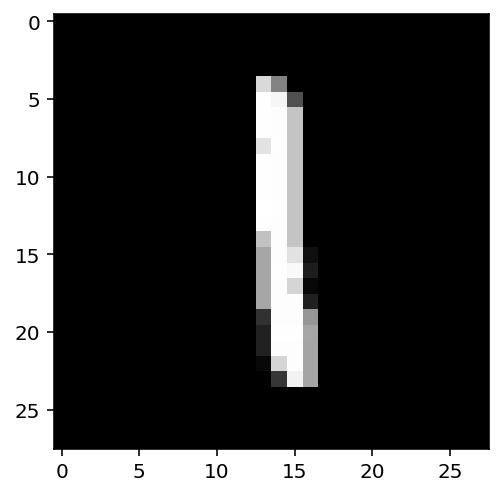

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [6]:
class Strive_Network(nn.Module):
    
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32,8 )
        self.fc4 = nn.Linear(8, 10)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        return x

model = Strive_Network()

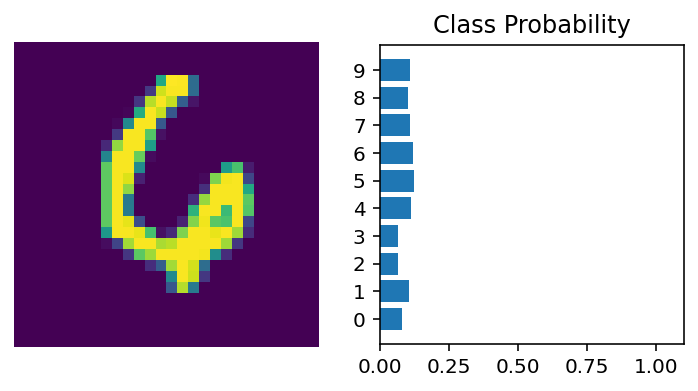

In [7]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
## TODO: Your training loop here
epochs = 3
print_every = 40

optimizer = optim.SGD(model.parameters(), lr=0.1)
for e in range(epochs):
    running_loss = 0
    total = 0
    correct = 0
    print(f"Epoch: {e+1}/{epochs}")

    model.train()
    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)   # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0
        

    model.eval()
    with torch.no_grad():
        for i, (images, labels) in enumerate(iter(testloader)):
            images.resize_(images.size()[0], 784)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network: %d %%' % (
        100 * correct / total))

Epoch: 1/3
	Iteration: 0	 Loss: 0.0576
	Iteration: 40	 Loss: 2.3022
	Iteration: 80	 Loss: 2.3029
	Iteration: 120	 Loss: 2.3014
	Iteration: 160	 Loss: 2.3004
	Iteration: 200	 Loss: 2.2984
	Iteration: 240	 Loss: 2.2961
	Iteration: 280	 Loss: 2.2884
	Iteration: 320	 Loss: 2.2740
	Iteration: 360	 Loss: 2.2340
	Iteration: 400	 Loss: 2.1823
	Iteration: 440	 Loss: 2.1308
	Iteration: 480	 Loss: 2.1457
	Iteration: 520	 Loss: 2.1061
	Iteration: 560	 Loss: 2.0608
	Iteration: 600	 Loss: 2.0848
	Iteration: 640	 Loss: 2.0722
	Iteration: 680	 Loss: 2.0333
	Iteration: 720	 Loss: 2.0298
	Iteration: 760	 Loss: 1.9706
	Iteration: 800	 Loss: 1.9832
	Iteration: 840	 Loss: 1.9646
	Iteration: 880	 Loss: 1.9609
	Iteration: 920	 Loss: 1.9041
	Iteration: 960	 Loss: 1.9306
	Iteration: 1000	 Loss: 1.9302
	Iteration: 1040	 Loss: 1.9075
	Iteration: 1080	 Loss: 1.9005
	Iteration: 1120	 Loss: 1.8934
	Iteration: 1160	 Loss: 1.9034
	Iteration: 1200	 Loss: 1.9060
	Iteration: 1240	 Loss: 1.8771
	Iteration: 1280	 Loss: 1.

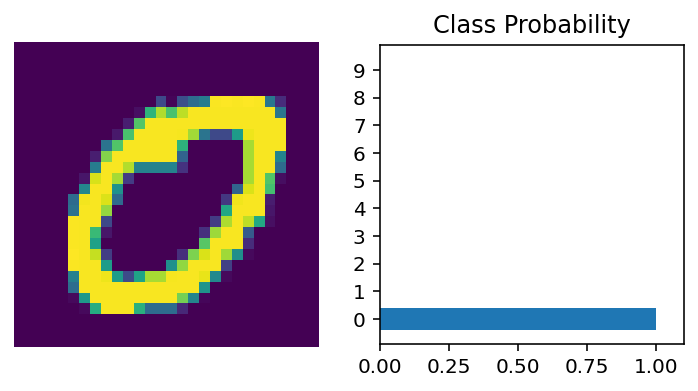

In [10]:
images, labels = next(iter(testloader))
images.resize_(images.shape[0],1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [12]:
save_path = "./model.pth"
torch.save(model.state_dict(),save_path)

In [14]:
model = Strive_Network()
model.load_state_dict(torch.load(save_path))
model.eval()

Strive_Network(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=10, bias=True)
)